In [1]:
import pandas as pd

# 1. Camera

In [2]:
data: pd.DataFrame = pd.read_parquet('s3://datalake-eu-central-1/ugiO-atchackathon/raw/other/camera_2022_09_01.parquet')

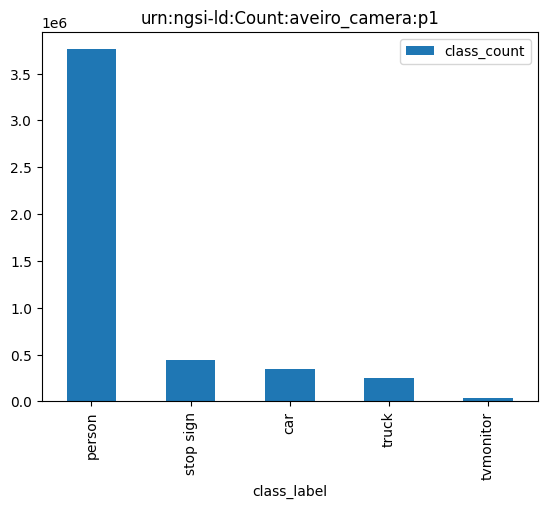

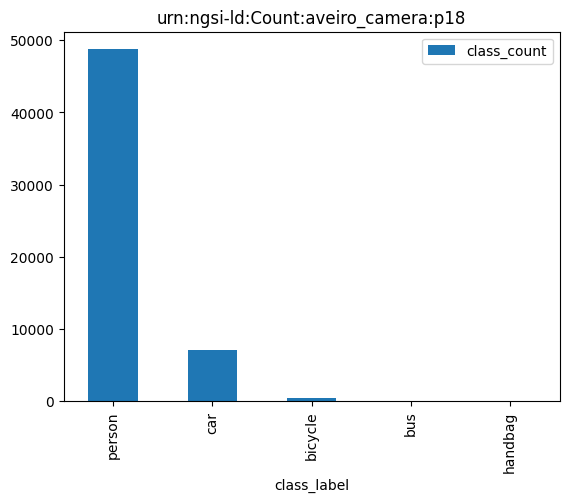

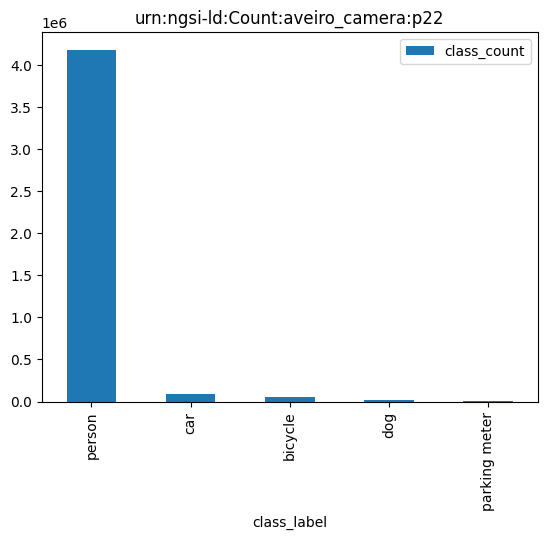

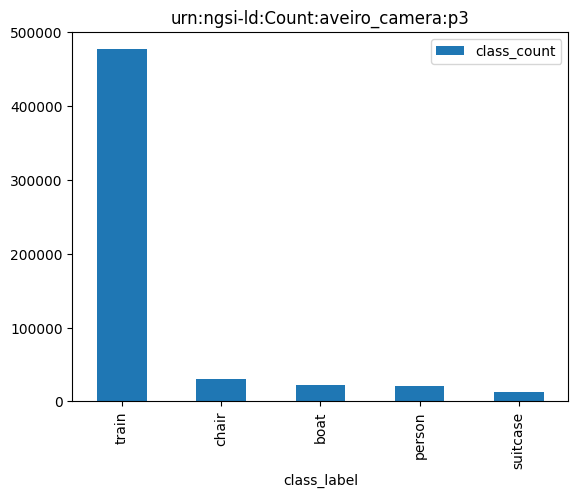

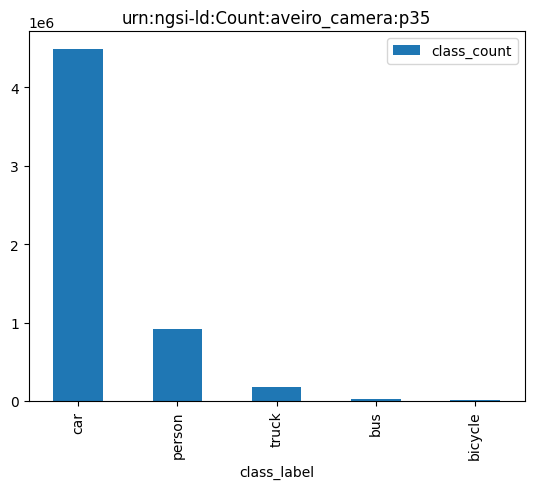

In [15]:
# plot most frequent objects by location

count_df: pd.DataFrame = data.groupby(by=['entity_id', 'class_label'], as_index=False)['class_count'].sum()
for entity in count_df['entity_id'].unique():
    temp: pd.DataFrame = count_df[count_df['entity_id'] == entity].sort_values(
        by='class_count', 
        ascending=False
    )[0:5]
    temp.plot.bar(x='class_label', y='class_count', title=entity)

# 2. Radar Count

In [39]:
data: pd.DataFrame = pd.read_parquet('s3://datalake-eu-central-1/ugiO-atchackathon/raw/radar/radar_count_2022_09_01.parquet')

In [45]:
data['time_index']: pd.Series = data.time_index.astype('datetime64[m]')

In [47]:
data.head()

,time_index,entity_id,faixa,vehiclelight,speedlight,vehicleheavy,speedheavy,vehicleothers,speedothers,accelerationlight,accelerationheavy,accelerationothers
0,2022-09-01,urn:ngsi-ld:Count:aveiro_radar:p30,2,1,14.189285,0,0.0,0,0.000000,0.002512,0.0,0.000000
1,2022-09-01,urn:ngsi-ld:Count:aveiro_radar:p1,1,1,17.344444,0,0.0,0,0.000000,-0.007720,0.0,0.000000
2,2022-09-01,urn:ngsi-ld:Count:aveiro_radar:p35,1,1,10.088282,0,0.0,0,0.000000,0.025590,0.0,0.000000
3,2022-09-01,urn:ngsi-ld:Count:aveiro_radar:p35,2,2,10.951778,0,0.0,0,0.000000,-0.173418,0.0,0.000000
4,2022-09-01,urn:ngsi-ld:Count:aveiro_radar:p3,2,4,10.496117,0,0.0,1,0.895652,0.055754,0.0,0.011271
